In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [5]:
suicide = pd.read_csv('suicide_rate.csv')

In [6]:
suicide.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [7]:
suicide.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [8]:
suicide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [9]:
suicide.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [10]:
suicide.isnull().any()

country               False
year                  False
sex                   False
age                   False
suicides_no           False
population            False
suicides/100k pop     False
country-year          False
HDI for year           True
 gdp_for_year ($)     False
gdp_per_capita ($)    False
generation            False
dtype: bool

It appears there is a sizeable correlation between the suicide count and the population of a country.

In [11]:
suicide.corr()["suicides_no"]

year                 -0.004546
suicides_no           1.000000
population            0.616162
suicides/100k pop     0.306604
HDI for year          0.151399
gdp_per_capita ($)    0.061330
Name: suicides_no, dtype: float64

In [12]:
suicide.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

There are 101 countries recorded in the dataset.

In [13]:
print(suicide.country.unique())
suicide.country.nunique()

['Albania' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Barbados' 'Belarus' 'Belgium'
 'Belize' 'Bosnia and Herzegovina' 'Brazil' 'Bulgaria' 'Cabo Verde'
 'Canada' 'Chile' 'Colombia' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czech Republic' 'Denmark' 'Dominica' 'Ecuador' 'El Salvador' 'Estonia'
 'Fiji' 'Finland' 'France' 'Georgia' 'Germany' 'Greece' 'Grenada'
 'Guatemala' 'Guyana' 'Hungary' 'Iceland' 'Ireland' 'Israel' 'Italy'
 'Jamaica' 'Japan' 'Kazakhstan' 'Kiribati' 'Kuwait' 'Kyrgyzstan' 'Latvia'
 'Lithuania' 'Luxembourg' 'Macau' 'Maldives' 'Malta' 'Mauritius' 'Mexico'
 'Mongolia' 'Montenegro' 'Netherlands' 'New Zealand' 'Nicaragua' 'Norway'
 'Oman' 'Panama' 'Paraguay' 'Philippines' 'Poland' 'Portugal'
 'Puerto Rico' 'Qatar' 'Republic of Korea' 'Romania' 'Russian Federation'
 'Saint Kitts and Nevis' 'Saint Lucia' 'Saint Vincent and Grenadines'
 'San Marino' 'Serbia' 'Seychelles' 'Singapore' 'Slovakia' 'Slovenia'
 'South 

101

There are 6 categories of generations.

In [14]:
print(suicide.generation.unique())
suicide.generation.nunique()

['Generation X' 'Silent' 'G.I. Generation' 'Boomers' 'Millenials'
 'Generation Z']


6

In [15]:
suicide_pop= suicide.groupby("country")["population"].sum()

In [16]:
suicide_pop_df=pd.DataFrame(suicide_pop)
print(suicide_pop_df)

                      population
country                         
Albania                 62325467
Antigua and Barbuda      1990228
Argentina             1035985431
Armenia                 77348173
Aruba                    1259677
...                          ...
United Arab Emirates    36502275
United Kingdom        1738767780
United States         8054027201
Uruguay                 84068943
Uzbekistan             486422532

[101 rows x 1 columns]


Top 10 most populous countries

In [17]:
suicide_pop_sorted= suicide_pop_df.sort_values("population", ascending=False)
suicide_pop_sorted.head(10)

,population
country,
United States,8054027201
Brazil,4856093548
Russian Federation,3690802620
Japan,3681024844
Mexico,2772959159
Germany,2024875612
United Kingdom,1738767780
Italy,1715043704
France,1670756775


In [18]:
country_suicide= suicide.groupby("country")["suicides_no"].sum()
print(country_suicide)

country
Albania                    1970
Antigua and Barbuda          11
Argentina                 82219
Armenia                    1905
Aruba                       101
                         ...   
United Arab Emirates        622
United Kingdom           136805
United States           1034013
Uruguay                   13138
Uzbekistan                34803
Name: suicides_no, Length: 101, dtype: int64


In [19]:
country_suicide_df= pd.DataFrame(country_suicide)

Russia tops the list for the number of suicides committed in a country, followed closely by the United States and Japan.

In [20]:
country_suicide_sorted= country_suicide_df.sort_values("suicides_no", ascending=False)
country_suicide_sorted.head(10)

,suicides_no
country,
Russian Federation,1209742
United States,1034013
Japan,806902
France,329127
Ukraine,319950
Germany,291262
Republic of Korea,261730
Brazil,226613
Poland,139098


In [23]:
suicide_pop_suicide= suicide.groupby(["country"]).aggregate({"population":"sum","suicides_no":"sum"})
#trying to derive a suicide rate column - suicides_no/population *time period(365days)*100 to get a percentage
suicide_pop_suicide['suicide_rate(%)'] = (suicide_pop_suicide['suicides_no']/suicide_pop_suicide['population'])*36500
suicide_pop_suicide

,population,suicides_no,suicide_rate(%)
country,,,
Albania,62325467,1970,1.153702
Antigua and Barbuda,1990228,11,0.201736
Argentina,1035985431,82219,2.896753
Armenia,77348173,1905,0.898955
Aruba,1259677,101,2.926544
...,...,...,...
United Arab Emirates,36502275,622,0.621961
United Kingdom,1738767780,136805,2.871794
United States,8054027201,1034013,4.686038


In [26]:
suicide_popsu_sorted = suicide_pop_suicide.sort_values(["population","suicides_no"], ascending=[False,False])
top_popsuicide =suicide_popsu_sorted.head(10)
top_popsuicide

,population,suicides_no,suicide_rate(%)
country,,,
United States,8054027201,1034013,4.686038
Brazil,4856093548,226613,1.703298
Russian Federation,3690802620,1209742,11.963680
Japan,3681024844,806902,8.001012
Mexico,2772959159,111139,1.462904
Germany,2024875612,291262,5.250230
United Kingdom,1738767780,136805,2.871794
Italy,1715043704,132060,2.810535
France,1670756775,329127,7.190236


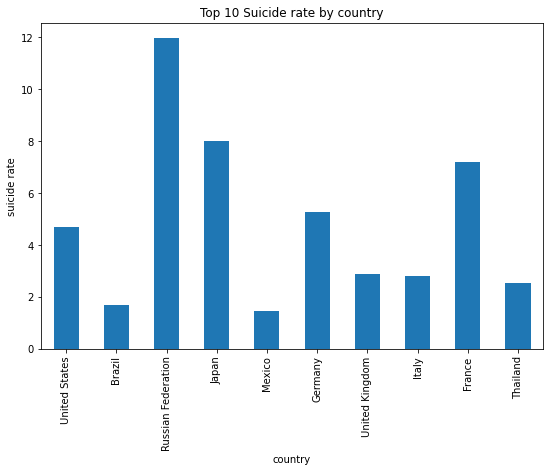

In [34]:
top_popsuicide["suicide_rate(%)"].plot.bar(ylabel = "suicide rate",title = "Top 10 Suicide rate by country", figsize=(9,6));

In [35]:
age_gen_suicide= suicide.groupby("age")["suicides_no"].sum()
age_gen_suicide

age
15-24 years     808542
25-34 years    1123912
35-54 years    2452141
5-14 years       52264
55-74 years    1658443
75+ years       653118
Name: suicides_no, dtype: int64

In [50]:
age_gen_df=pd.DataFrame(age_gen_suicide)
age_gen_sorted = age_gen_df.sort_values("suicides_no", ascending = False)
age_gen_sorted

,suicides_no
age,
35-54 years,2452141
55-74 years,1658443
25-34 years,1123912
15-24 years,808542
75+ years,653118
5-14 years,52264


In [53]:
age_gen_sorted["percentage(%)"] = age_gen_sorted["suicides_no"]/age_gen_sorted["suicides_no"].sum() * 100
age_gen= age_gen_sorted.reset_index()
age_gen

,age,suicides_no,percentage
0,35-54 years,2452141,36.336520
1,55-74 years,1658443,24.575278
2,25-34 years,1123912,16.654447
3,15-24 years,808542,11.981204
4,75+ years,653118,9.678088
5,5-14 years,52264,0.774463


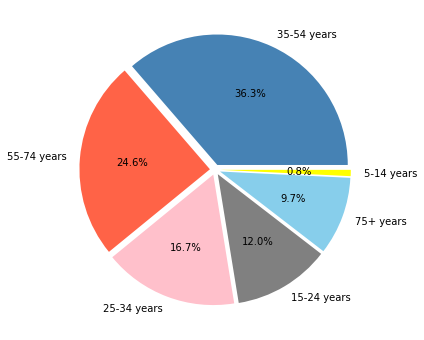

In [54]:
plt.figure(figsize=(8,6))
colors=['steelblue','tomato','pink','gray', 'skyblue','yellow']
explode = [0.04,0.04,0.04,0.04,0.04,0.04]
plt.pie(age_gen["percentage(%)"],labels = age_gen["age"], autopct='%1.1f%%', colors=colors, explode=explode);
plt.show()

More men commit suicide than women.

In [56]:
suicide_gender= suicide.groupby("sex")["suicides_no"].sum()
suicide_gender

sex
female    1559510
male      5188910
Name: suicides_no, dtype: int64

In [57]:
suicide_gender_df= pd.DataFrame(suicide_gender)
suicide_gender_df= suicide_gender_df.reset_index()
suicide_gender_df

,sex,suicides_no
0,female,1559510
1,male,5188910


Global Suicides per year

In [71]:
suicide_yearly= suicide.groupby("year")["suicides_no"].sum()
suicide_yearly_df=pd.DataFrame(suicide_yearly)
suicide_yearly=suicide_yearly_df.reset_index()
suicide_yearly

,year,suicides_no
0,1985,116063
1,1986,120670
2,1987,126842
3,1988,121026
4,1989,160244
5,1990,193361
6,1991,198020
7,1992,211473
8,1993,221565
9,1994,232063


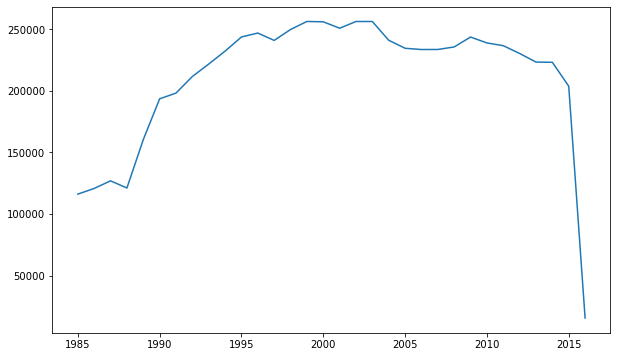

In [59]:
plt.figure(figsize=(10,6))
plt.plot(suicide_yearly)
plt.show()

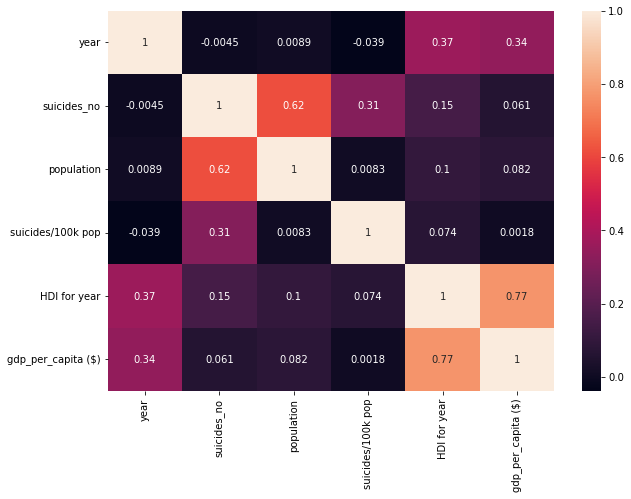

In [60]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(suicide.corr(), annot = True).set_title = 'Heatmap'
plt.show()

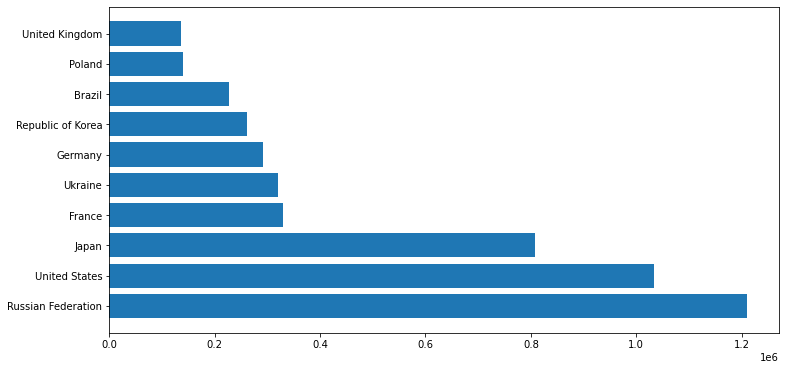

In [61]:
data = country_suicide_sorted.head(10)
x = data.index
y = data["suicides_no"]
plt.figure(figsize = (12,6))
plt.barh(x,y)
plt.title = "Top 10 countries with highest suicide number"
plt.xlabel = "Suicide Number"
plt.ylabel = "Countries"
plt.show()


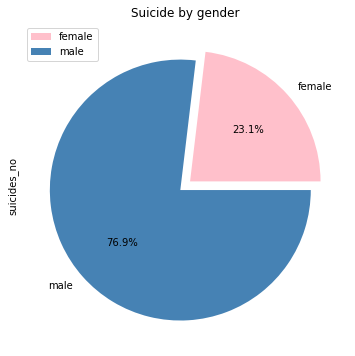

In [77]:
colors=['pink','steelblue']
explode=[0.05,0.05]
suicide_gender_df.groupby(["sex"]).sum().plot(kind = 'pie', y='suicides_no', autopct='%1.1f%%',title="Suicide by gender",colors=colors,explode=explode,figsize=(9,6));

Years with the highest average death

In [63]:
suicide_avg= suicide.groupby(["year"])["suicides_no"].mean()
suicide_avg_df=pd.DataFrame(suicide_avg)
suicide_avg_sorted = suicide_avg_df.sort_values('suicides_no', ascending=False)
top_suicide_avg = suicide_avg_sorted.head(10)
top_suicide_avg.rename(columns={"suicides_no": "avg_suicides"}, inplace = True)
top_suicide_avg

C:\Users\Ayodeji\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,avg_suicides
year,
1994,284.390931
1993,284.057692
2015,273.709677
1992,271.119231
1996,267.018398
1998,263.281646
1997,260.546537
1995,260.196581
1991,257.838542


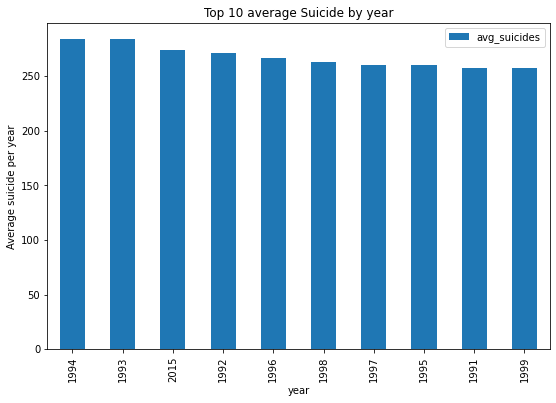

In [65]:
top_suicide_avg.plot.bar(ylabel="Average suicide per year", title="Top 10 average Suicide by year", figsize=(9,6));